In [6]:
import pandas as pd
import matplotlib.pyplot as plt

数据最大最小值:
Diabetes_binary          0.0
HighBP                   0.0
HighChol                 0.0
CholCheck                0.0
BMI                     12.0
Smoker                   0.0
Stroke                   0.0
HeartDiseaseorAttack     0.0
PhysActivity             0.0
Fruits                   0.0
Veggies                  0.0
HvyAlcoholConsump        0.0
AnyHealthcare            0.0
NoDocbcCost              0.0
GenHlth                  1.0
MentHlth                 0.0
PhysHlth                 0.0
DiffWalk                 0.0
Sex                      0.0
Age                      1.0
Education                1.0
Income                   1.0
dtype: float64
Diabetes_binary          1.0
HighBP                   1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
Stroke                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump  

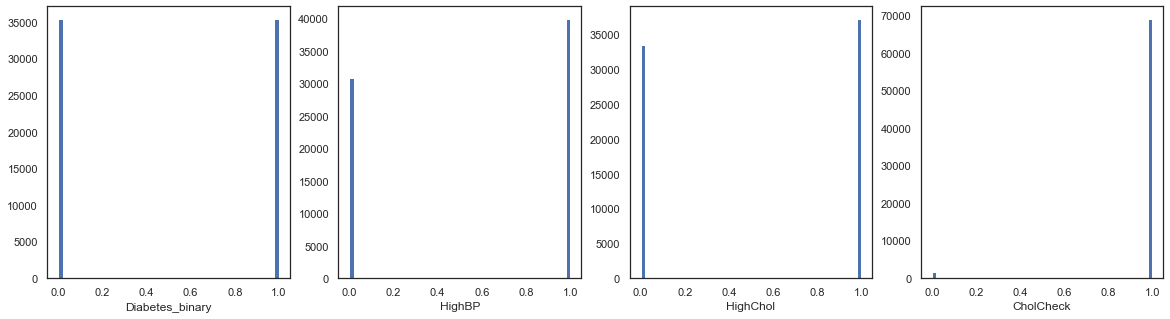

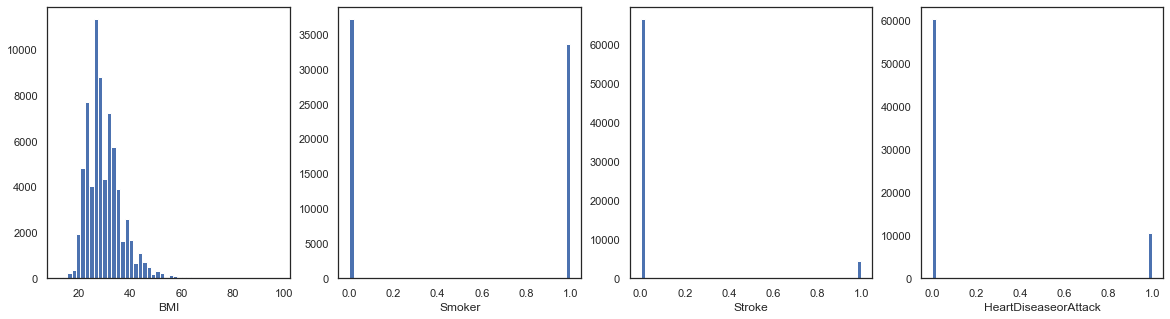

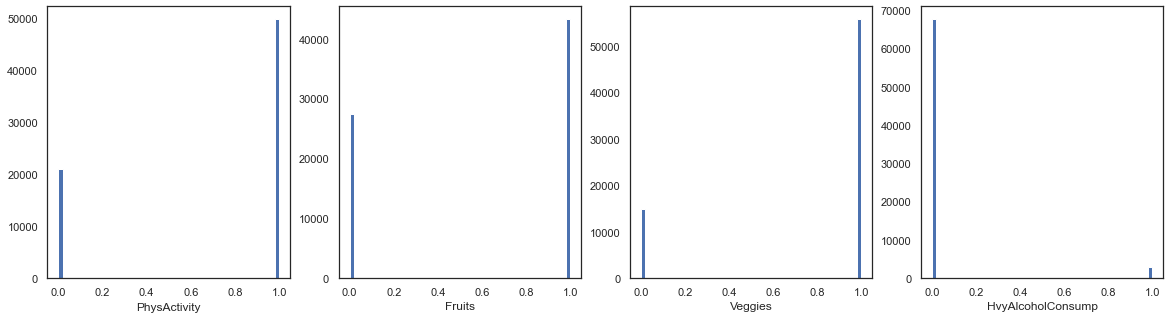

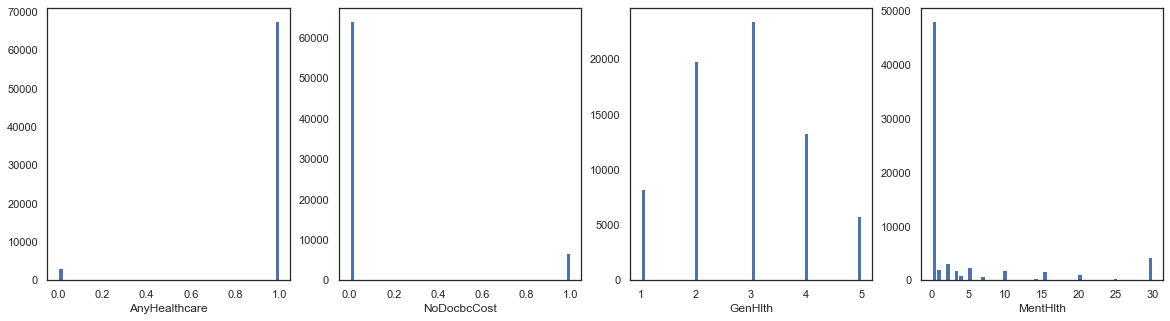

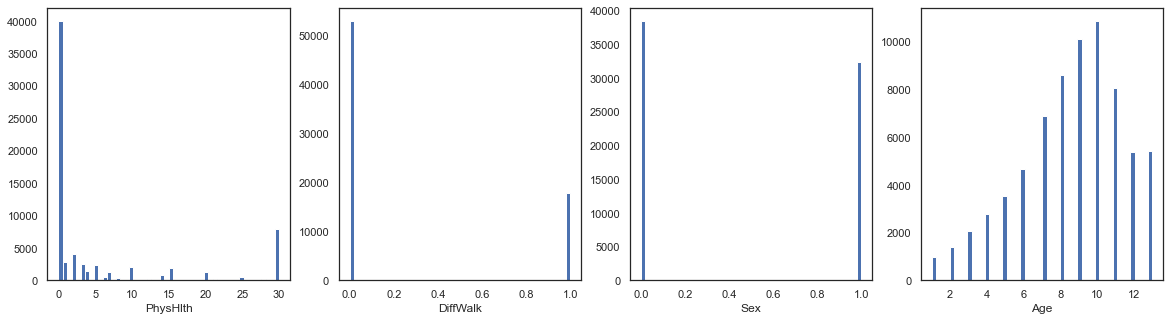

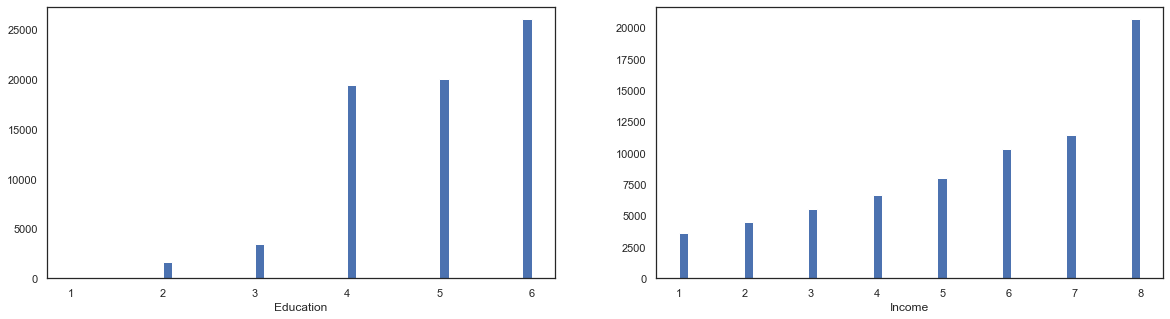

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV数据
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 统计性描述
print('数据最大最小值:')
print(data.min())
print(data.max())

# 循环绘制图表
for i in range(0, len(data.columns), 4):
    features = data.columns[i:i+4]
    fig, axs = plt.subplots(1, len(features), figsize=(20, 5))
    for j, feature in enumerate(features):
        axs[j].hist(data[feature], bins=50)
        axs[j].set_xlabel(feature)
    plt.show()

Selected features: ['GenHlth', 'HighBP', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack', 'Education']


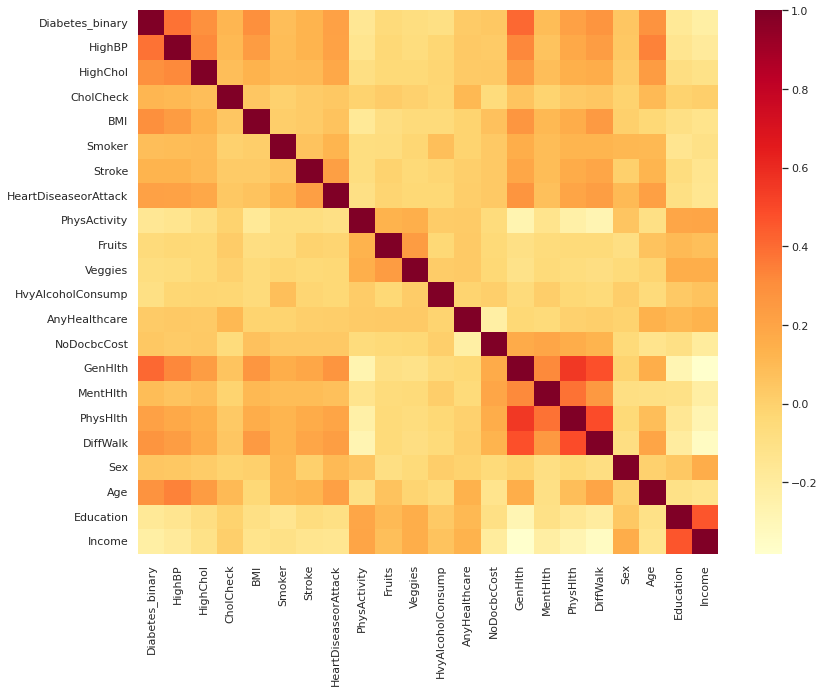

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建随机数据
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 计算相关性矩阵
corr_matrix = np.corrcoef(df.values, rowvar=False)

# 找出与第一列特征相关性较强的特征（大小排名前10）
feature_names = list(df.columns)
selected_features = []
corr_with_first_feature = abs(corr_matrix[0][1:])  # 选取与第一列特征相关性
top10_indices = np.argsort(corr_with_first_feature)[::-1][:10]
for idx in top10_indices:
    selected_features.append(feature_names[idx+1])  # 跳过第一个特征本身
print("Selected features:", selected_features)


new_df = df[selected_features]
new_df.to_csv("selected_dataset.csv", index=False)

# 绘制热力图
sns.set(style='dark')
fig, ax = plt.subplots(figsize=(13, 10))  # 设置figsize参数以调整图像大小
sns.heatmap(corr_matrix, cmap='YlOrRd', ax=ax, xticklabels=df.columns.values, yticklabels=df.columns.values)
plt.show()

In [12]:
# 找出与第一列特征相关性较强的特征（大小排名前10）
feature_names = list(df.columns)
selected_features = {}
corr_with_first_feature = abs(corr_matrix[0][1:])  # 选取与第一列特征相关性
top10_indices = np.argsort(corr_with_first_feature)[::-1][:10]
for idx in top10_indices:
    feature_name = feature_names[idx+1]  # 跳过第一个特征本身
    correlation = corr_with_first_feature[idx]
    selected_features[feature_name] = correlation
print("Selected features and their correlation with the first feature:", selected_features)

Selected features and their correlation with the first feature: {'GenHlth': 0.40761159849491363, 'HighBP': 0.3815155489073097, 'BMI': 0.29337274476104624, 'HighChol': 0.28921280708865127, 'Age': 0.2787380662819017, 'DiffWalk': 0.27264600615980744, 'Income': 0.2244487149638195, 'PhysHlth': 0.2130810190381066, 'HeartDiseaseorAttack': 0.2115234043602268, 'Education': 0.17048063498805915}


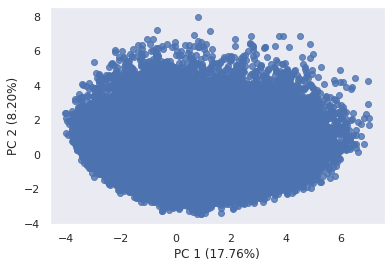

In [23]:
'''主成分分析'''
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
 
# 加载数据
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
columns=df.columns

# 截取部分特征
df_new = df[columns].copy()

# 去除缺失值
df_new = df_new.dropna()

# 数据标准化
df_std = (df_new - df_new.mean()) / df_new.std()

# 主成分分析
pca = PCA()
pca.fit(df_std)

# 可视化主成分分析的结果
principal_components = pca.transform(df_std)
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.8)
plt.xlabel('PC 1 ({:.2f}%)'.format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel('PC 2 ({:.2f}%)'.format(pca.explained_variance_ratio_[1] * 100))
plt.show()

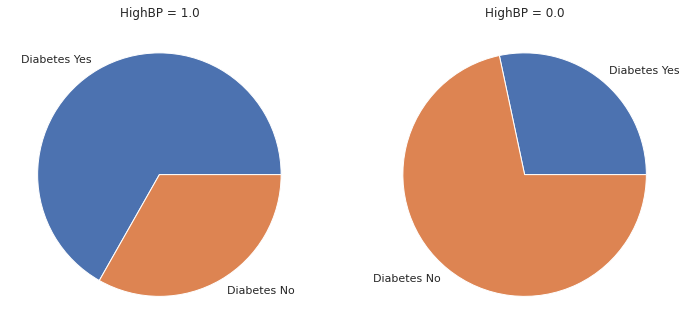

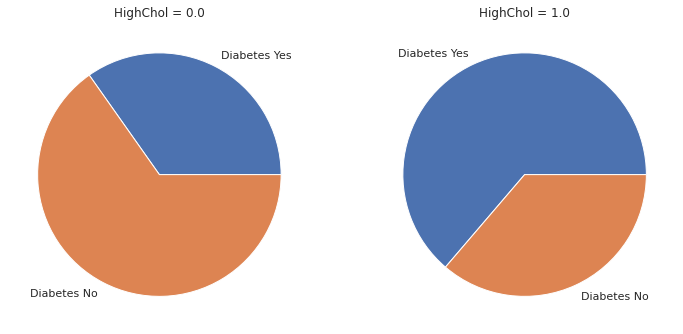

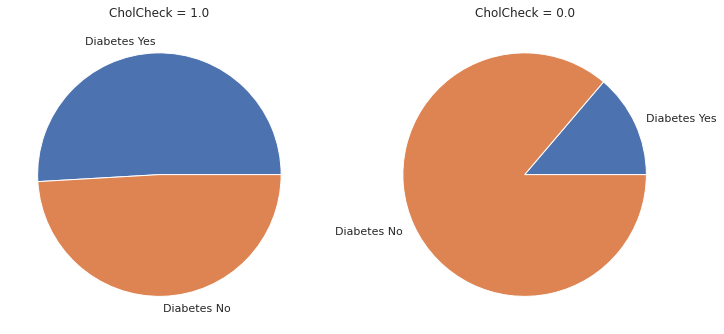

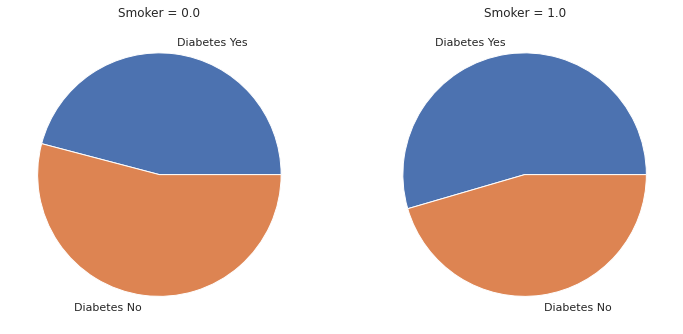

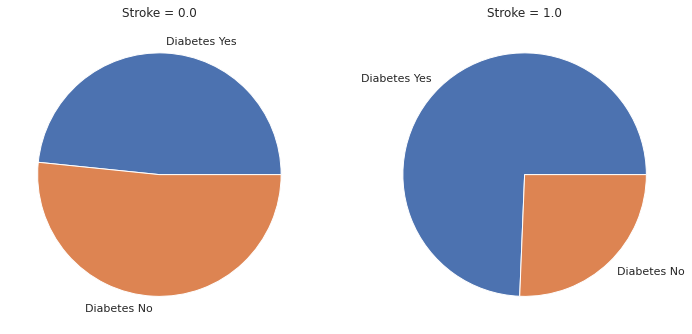

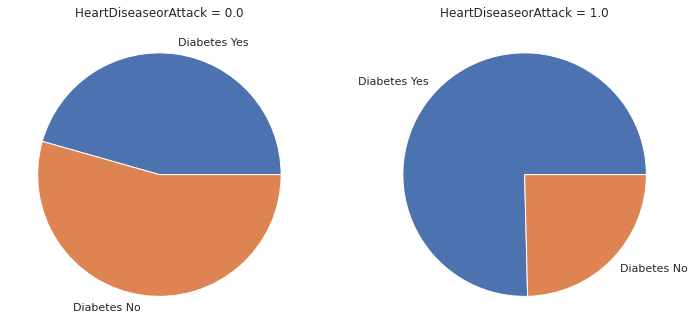

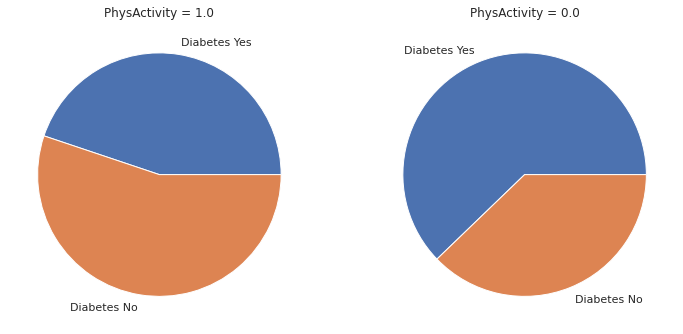

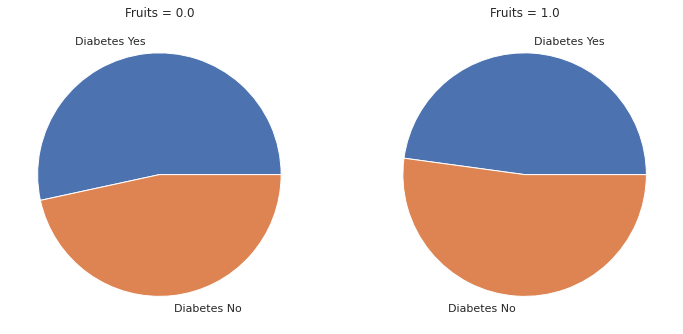

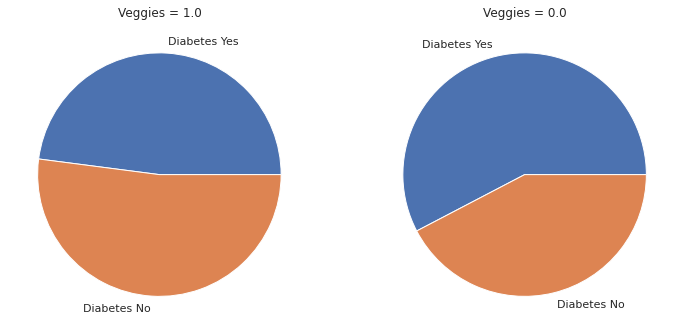

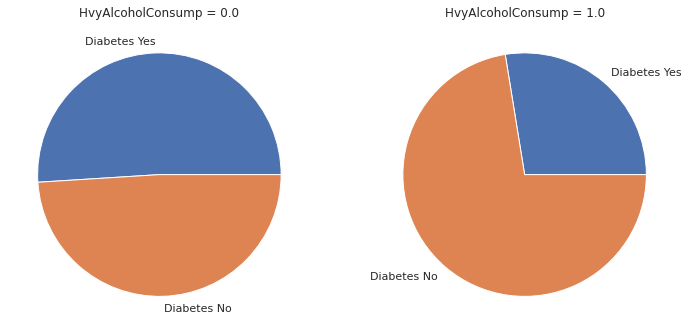

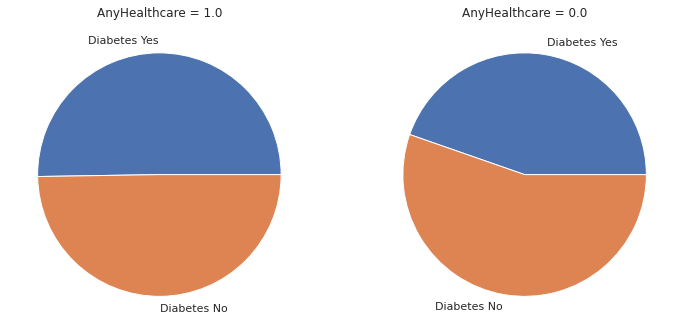

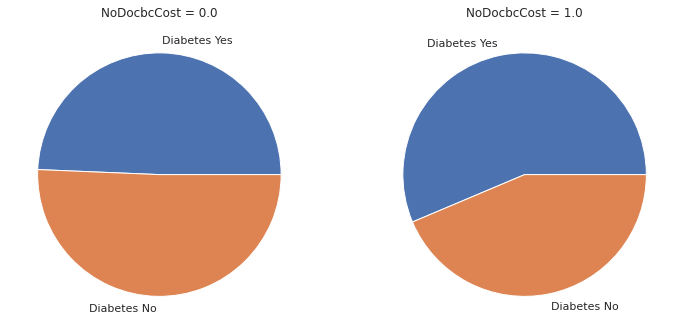

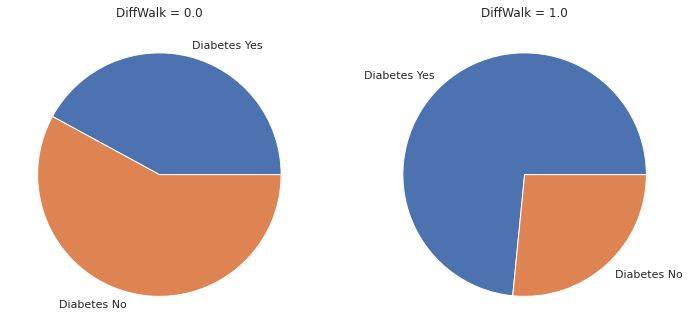

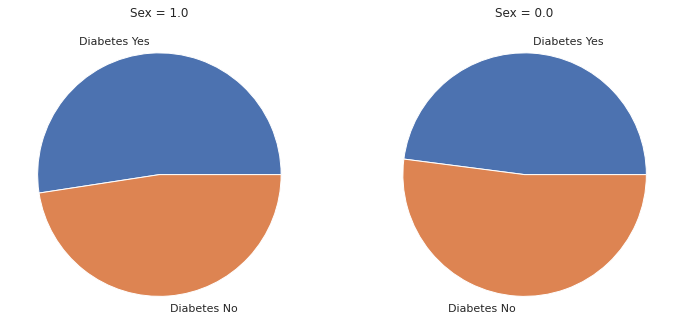

In [31]:
'''绘制饼图'''
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 循环遍历特征列表
for column in df.columns[1:]:
    unique_values = df[column].unique()
    if len(unique_values) == 2:  # 如果特征只有两个值
        # 统计数据
        yes_diabetes_yes = df[(df[column] == unique_values[0]) & (df['Diabetes_binary'] == 1)]['Diabetes_binary'].count()
        yes_diabetes_no = df[(df[column] == unique_values[0]) & (df['Diabetes_binary'] == 0)]['Diabetes_binary'].count()
        no_diabetes_yes = df[(df[column] == unique_values[1]) & (df['Diabetes_binary'] == 1)]['Diabetes_binary'].count()
        no_diabetes_no = df[(df[column] == unique_values[1]) & (df['Diabetes_binary'] == 0)]['Diabetes_binary'].count()
        
        # 创建新的图形，设置图形大小
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # 绘制饼图
        ax1.pie([yes_diabetes_yes, yes_diabetes_no], labels=['Diabetes Yes', 'Diabetes No'])
        ax1.set_title(column + ' = ' + str(unique_values[0]))
        ax2.pie([no_diabetes_yes, no_diabetes_no], labels=['Diabetes Yes', 'Diabetes No'])
        ax2.set_title(column + ' = ' + str(unique_values[1]))

        # 显示图形
        plt.show()

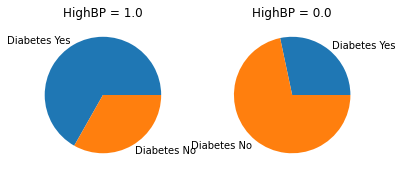

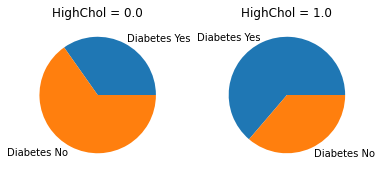

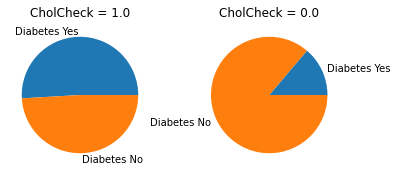

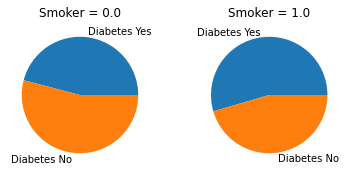

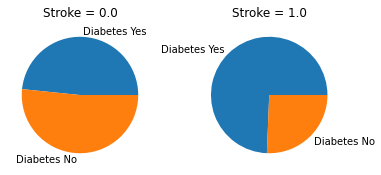

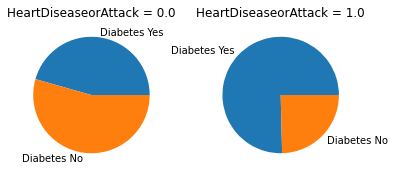

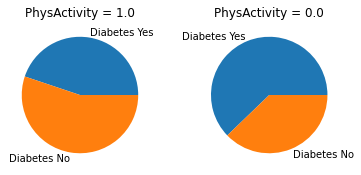

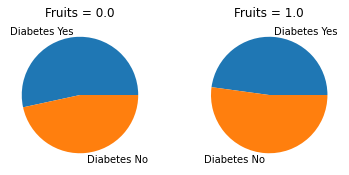

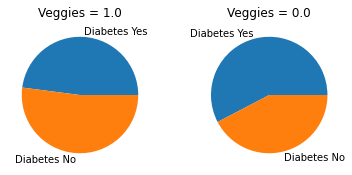

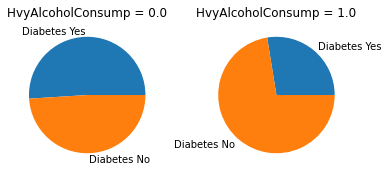

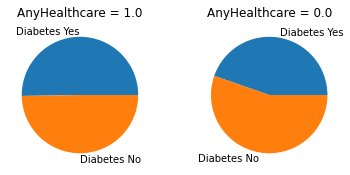

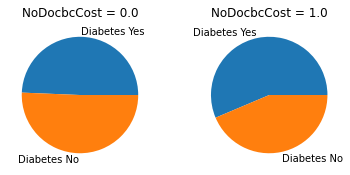

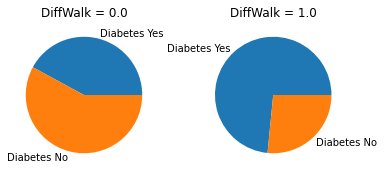

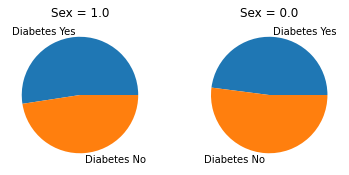

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 循环遍历特征列表
for column in df.columns[1:]:
    unique_values = df[column].unique()
    if len(unique_values) == 2:  # 如果特征只有两个值
        # 统计数据
        yes_diabetes_yes = df[(df[column] == unique_values[0]) & (df['Diabetes_binary'] == 1)]['Diabetes_binary'].count()
        yes_diabetes_no = df[(df[column] == unique_values[0]) & (df['Diabetes_binary'] == 0)]['Diabetes_binary'].count()
        no_diabetes_yes = df[(df[column] == unique_values[1]) & (df['Diabetes_binary'] == 1)]['Diabetes_binary'].count()
        no_diabetes_no = df[(df[column] == unique_values[1]) & (df['Diabetes_binary'] == 0)]['Diabetes_binary'].count()
        
        # 创建新的图形，设置图形大小
        fig, axs = plt.subplots(1, 2, figsize=(6, 3))

        # 调整子图的位置和间距
        fig.subplots_adjust(wspace=0.3)

        # 绘制饼图
        axs[0].pie([yes_diabetes_yes, yes_diabetes_no], labels=['Diabetes Yes', 'Diabetes No'])
        axs[0].set_title(column + ' = ' + str(unique_values[0]))
        axs[1].pie([no_diabetes_yes, no_diabetes_no], labels=['Diabetes Yes', 'Diabetes No'])
        axs[1].set_title(column + ' = ' + str(unique_values[1]))

        # 显示图形
        plt.show()

In [1]:
'''标准化处理并生成文件'''
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 读取数据
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# 选择需要标准化的特征列
features = ['BMI', 'GenHlth', 'PhysHlth','Age','Education', 'Income']

# 使用 StandardScaler 对数据进行标准化
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
data.to_csv('normalized_data_binary5050.csv', index=False)


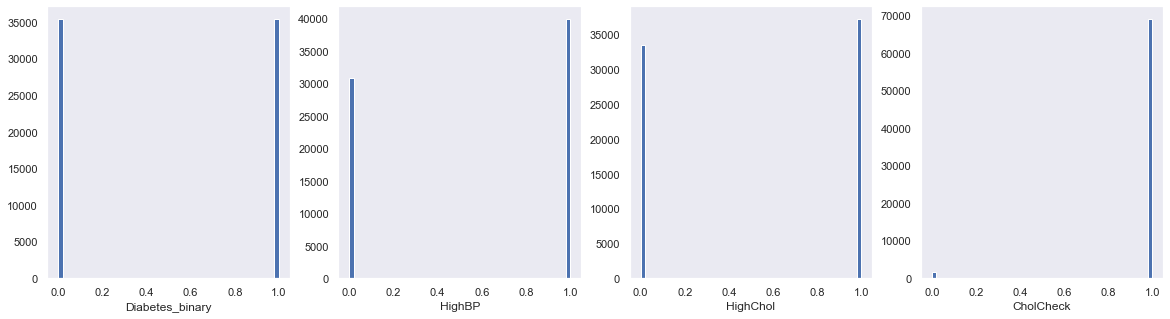

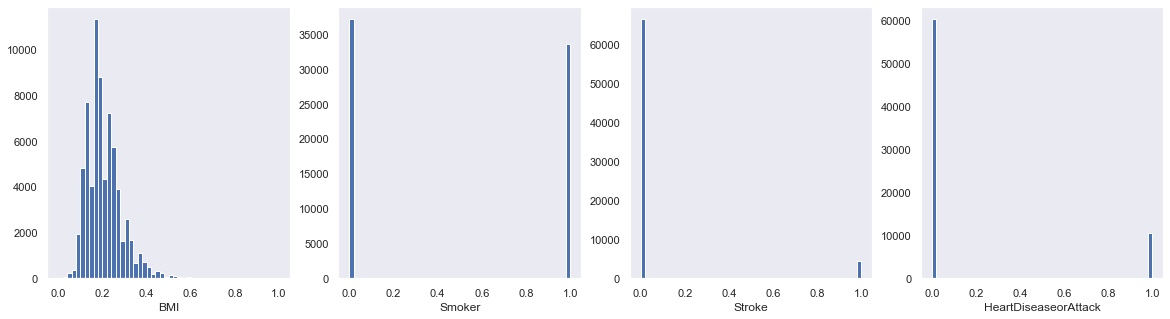

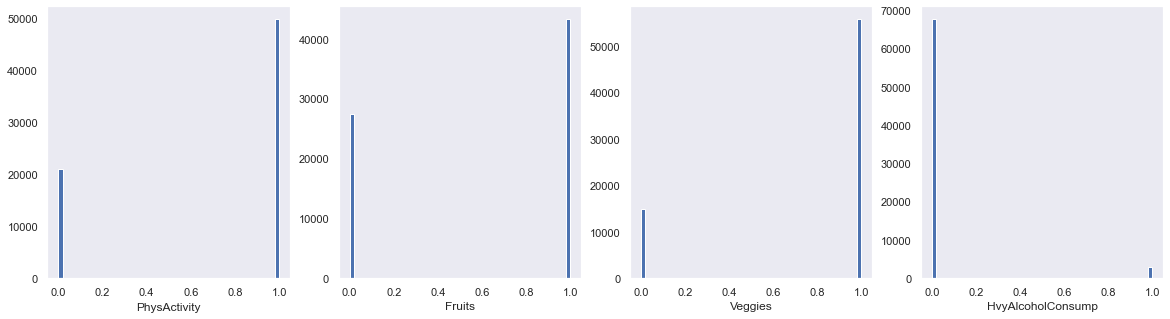

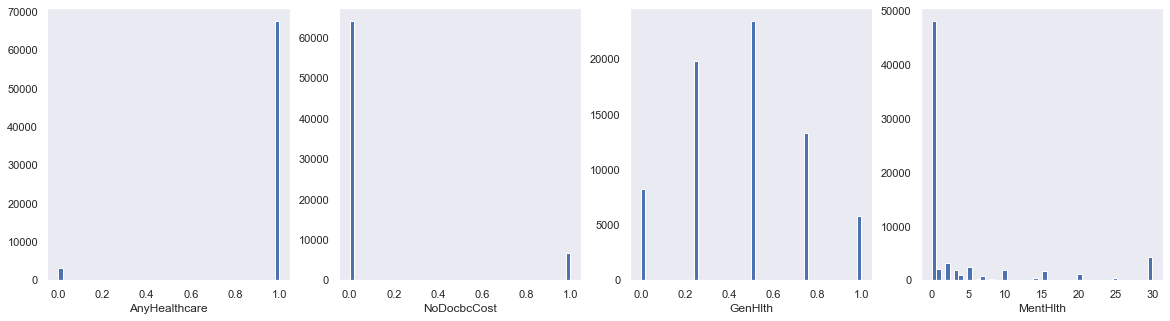

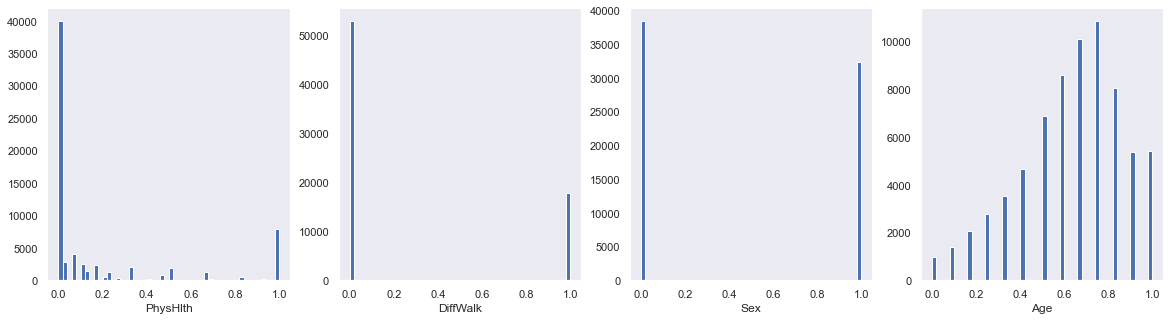

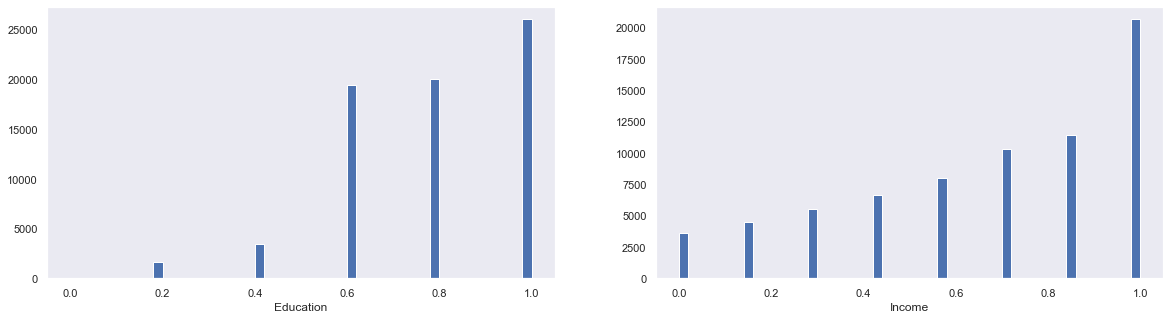

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


# 循环绘制图表
for i in range(0, len(data.columns), 4):
    features = data.columns[i:i+4]
    fig, axs = plt.subplots(1, len(features), figsize=(20, 5))
    for j, feature in enumerate(features):
        axs[j].hist(data[feature], bins=50)
        axs[j].set_xlabel(feature)
    plt.show()

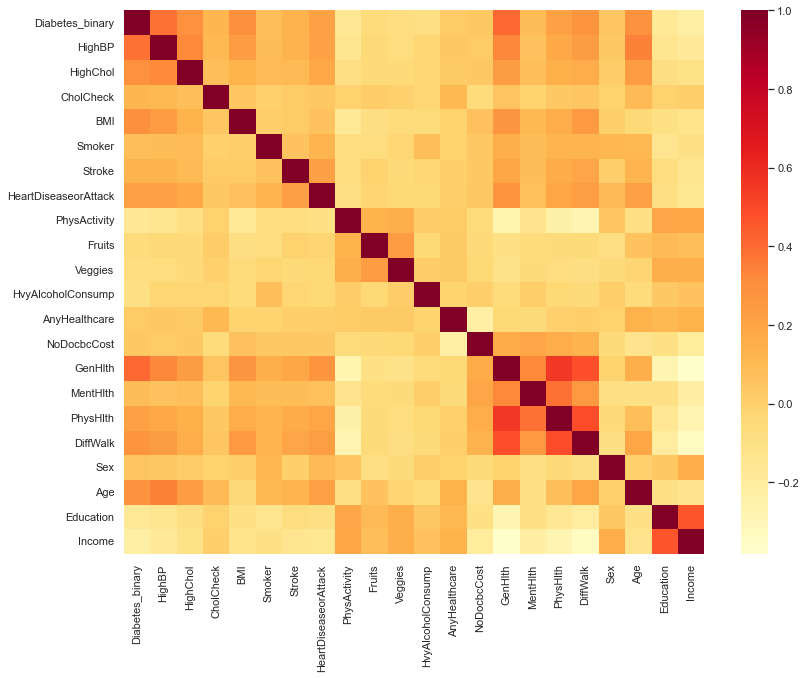

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建随机数据
np.random.seed(42)
df = pd.read_csv('normalized_data_binary5050.csv')

# 计算相关性矩阵
corr_matrix = np.corrcoef(df.values, rowvar=False)

# 创建DataFrame
df_corr = pd.DataFrame(corr_matrix, columns = [df.columns[i] for i in range(22)])

# 绘制热力图
sns.set(style='dark')
fig, ax = plt.subplots(figsize=(13, 10))  # 设置figsize参数以调整图像大小
sns.heatmap(df_corr, cmap='YlOrRd', ax=ax, xticklabels=df.columns.values, yticklabels=df.columns.values)
plt.show()